<a href="https://colab.research.google.com/github/heona1231/SWAI_2023/blob/dev/1206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install PyMuPDF

In [1]:
from google.colab import files

In [ ]:
file = files.upload()

In [ ]:
import fitz
import re

doc = fitz.open('/content/data1.pdf')
data_text_list = []
for page in doc:
    data_text = page.get_text()
    data_text_list.append(data_text)

data_list = []

for s in data_text_list:
  data_list.append(re.split(r'\n\s*\n', s))

data_list = sum(data_list, [])

data_list = [s for s in data_list if s.strip()]
data_list.remove('(2023.03 기준) \n■ 임대주택 ')
data_list.remove('■ 주거급여 ')
data_list.remove('■ 보상 ')

data_list

In [ ]:
data_dictionary = {data_list[i]: data_list[i + 1] for i in range(0, len(data_list), 2)}

for question, answer in data_dictionary.items():
    print(f"Question: {question}\nAnswer: {answer}\n")

In [ ]:
pip install wordcloud

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [14]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

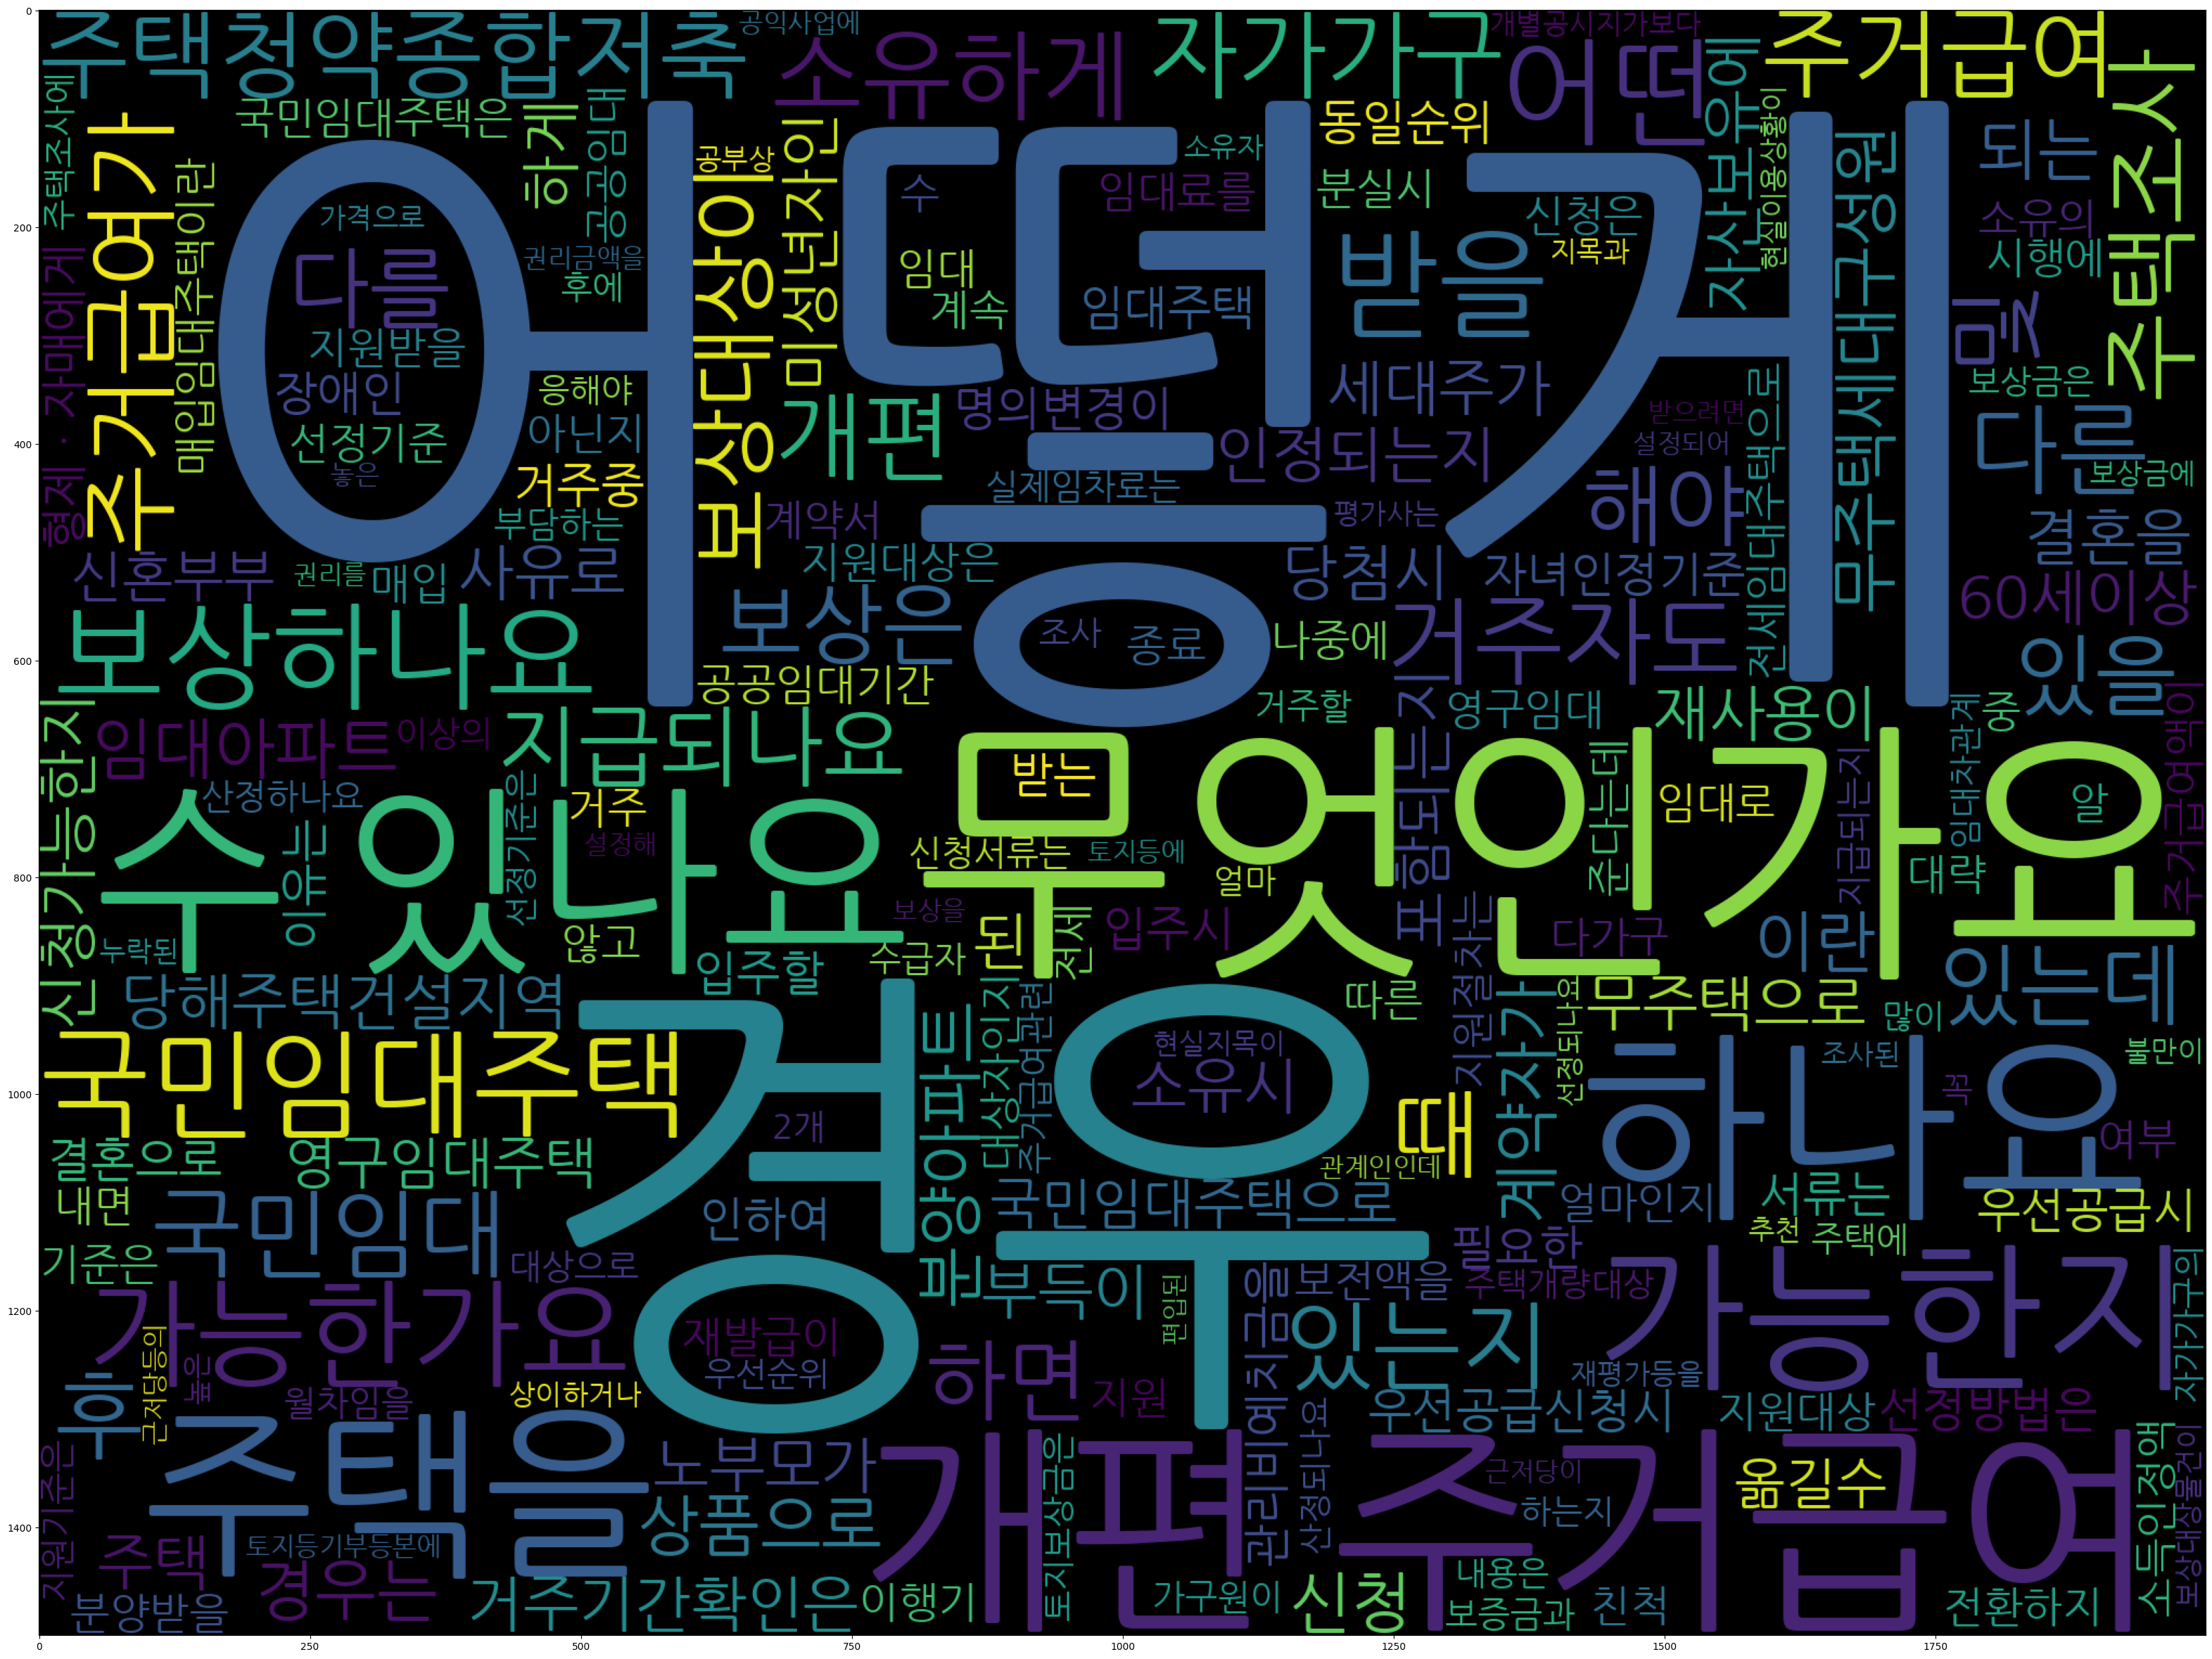

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data_keys = ""
for s in data_dictionary.keys():
  data_keys += s
wordcloud = WordCloud(font_path=path,width = 2000, height = 1500).generate(data_keys)

plt.figure(figsize = (40, 30))
plt.imshow(wordcloud)
plt.show()